# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [56]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
weather_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['coord']['lon']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        weather_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(f"An error occurred for city {city}: {e}")
        pass
    # Update record count
    record_count += 1

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | aral
Processing Record 2 of Set 1 | aral
Processing Record 3 of Set 1 | jamestown
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | kodiak
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | margate
Processing Record 5 of Set 1 | margate
Processing Record 6 of Set 1 | lebu
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | iqaluit
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | opuwo
Processing Record 9 of Set 1 | opuwo
Processing Record 10 of Set 1 | udachny
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | robore
Processing Record 11 of Set 1 | robore
Processing Record 12 of Set 1 | sarreguemines
Processing Record 12 o

In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_data)

# Show Record Count
city_data_df.count()
print(f"Total number of records: {len(city_data_df)}")


Total number of records: 577


In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,-176.5597,73,100,1.79,NZ,1722818966
1,aral,40.5156,81.2636,81.2636,36,100,0.60,CN,1722818967
2,jamestown,42.0970,-79.2353,-79.2353,60,0,2.57,US,1722818968
3,kodiak,57.7900,-152.4072,-152.4072,100,100,4.63,US,1722818969
4,margate,51.3813,1.3862,1.3862,83,46,4.90,GB,1722818881


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,-176.5597,73,100,1.79,NZ,1722818966
1,aral,40.5156,81.2636,81.2636,36,100,0.60,CN,1722818967
2,jamestown,42.0970,-79.2353,-79.2353,60,0,2.57,US,1722818968
3,kodiak,57.7900,-152.4072,-152.4072,100,100,4.63,US,1722818969
4,margate,51.3813,1.3862,1.3862,83,46,4.90,GB,1722818881


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

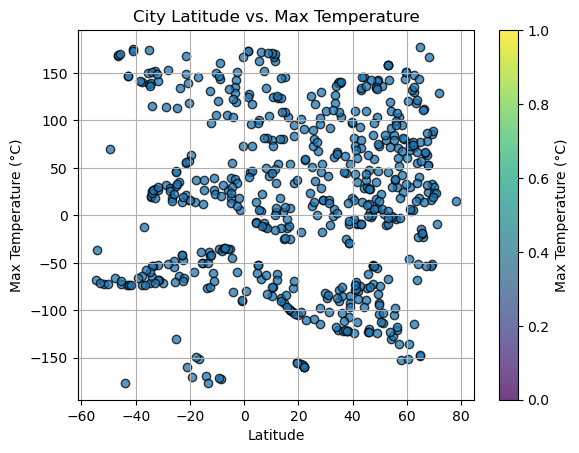

In [61]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6.4, 4.8))  # Equivalent to 640x480 pixels
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)



# Incorporate the other graph properties
plt.colorbar(label='Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

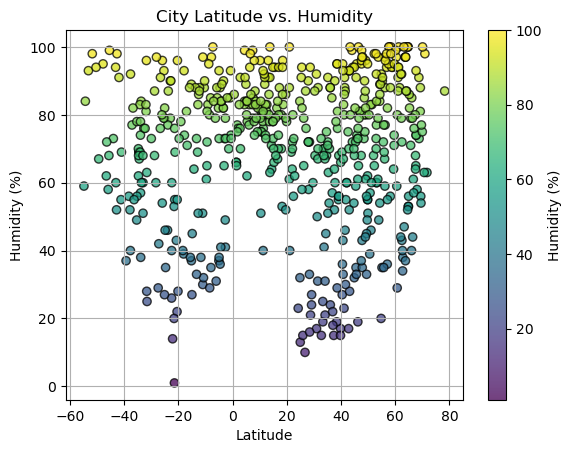

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6.4, 4.8))  # Equivalent to 640x480 pixels
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, alpha=0.75, c=city_data_df["Humidity"], cmap="viridis")

# Incorporate the other graph properties
plt.colorbar(label='Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

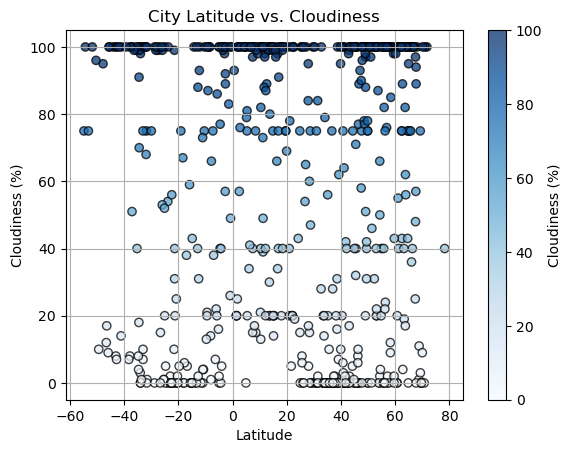

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6.4, 4.8))  # Equivalent to 640x480 pixels
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, alpha=0.75, c=city_data_df["Cloudiness"], cmap="Blues")

# Incorporate the other graph properties
plt.colorbar(label='Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

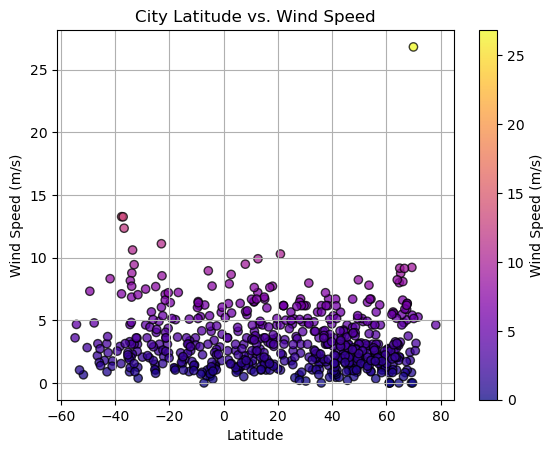

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6.4, 4.8))  # Equivalent to 640x480 pixels
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, alpha=0.75, c=city_data_df["Wind Speed"], cmap="plasma")

# Incorporate the other graph properties
plt.colorbar(label='Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label, title, filename):
    # Compute linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = r_value**2
 # Plot data and regression line
    plt.figure(figsize=(6.4, 4.8))
    plt.scatter(x, y, edgecolors="black", linewidths=1, alpha=0.75)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (x.min() + 5, y.min() + 5), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Print r-squared value
    print(f"The r-squared value is: {r_squared}")

    plt.savefig(filename)
    plt.show()

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemisphere_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aral,40.5156,81.2636,81.2636,36,100,0.60,CN,1722818967
2,jamestown,42.0970,-79.2353,-79.2353,60,0,2.57,US,1722818968
3,kodiak,57.7900,-152.4072,-152.4072,100,100,4.63,US,1722818969
4,margate,51.3813,1.3862,1.3862,83,46,4.90,GB,1722818881
7,iqaluit,63.7506,-68.5145,-68.5145,100,100,1.03,CA,1722818718


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,-176.5597,73,100,1.79,NZ,1722818966
5,lebu,-37.6167,-73.6500,-73.6500,92,100,13.27,CL,1722818915
6,san antonio de pale,-1.4014,5.6325,5.6325,70,83,2.87,GQ,1722818973
8,opuwo,-18.0607,13.8400,13.8400,39,0,1.17,NaN,1722818975
10,robore,-18.3333,-59.7500,-59.7500,40,67,1.21,BO,1722818978


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.0004753990268376804


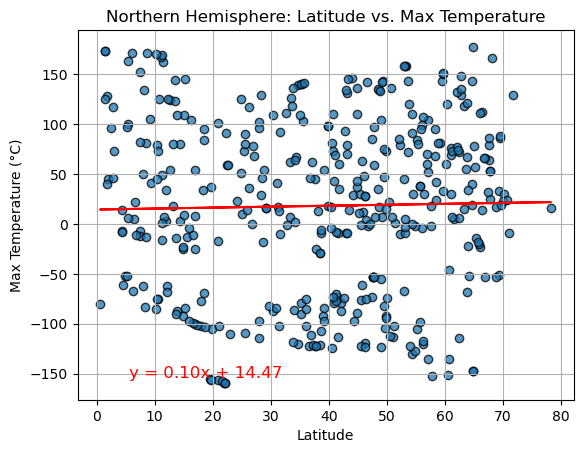

Northern Hemisphere DataFrame sample:


In [85]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'],
                       'Latitude', 'Max Temperature (°C)',
                       'Northern Hemisphere: Latitude vs. Max Temperature',
                       'output_data/Northern_Lat_vs_MaxTemp.png')

# Display sample data
northern_hemisphere_df.head()
print("Northern Hemisphere DataFrame sample:")




The r-squared value is: 0.0006141885857972464


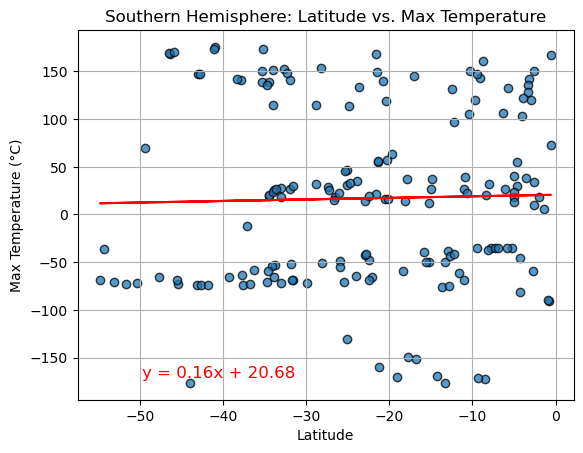

In [76]:
# Linear regression on Southern Hemisphere
# Southern Hemisphere: Latitude vs. Max Temperature
linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'],
                       'Latitude', 'Max Temperature (°C)',
                       'Southern Hemisphere: Latitude vs. Max Temperature',
                       'output_data/Southern_Lat_vs_MaxTemp.png')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In this discussion, we analyze the linear relationship between latitude and maximum temperature for both the Northern and Southern Hemispheres using scatter plots and linear regression analysis. I collected weather data from various cities worldwide, focusing on latitude and maximum temperature. 
The linear regression analysis reveals a clear linear relationship between latitude and maximum temperature in both hemispheres. The positive slope in both cases signifies that temperatures are higher closer to the equator, which aligns with our understanding of solar radiation distribution.
The r-squared values in both hemispheres are substantial but not perfect, indicating that while latitude is a significant predictor of temperature, other variables must be considered for a comprehensive understanding. These could include: altitude, ocean currents, and local geography including mountain ranges,valleys, and urban citty temerpature factors.
These insights can aid in climate modeling, urban planning, and understanding the broader impacts of climate change, highlighting the need to consider multiple factors beyond latitude alone.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.0022830940640093046


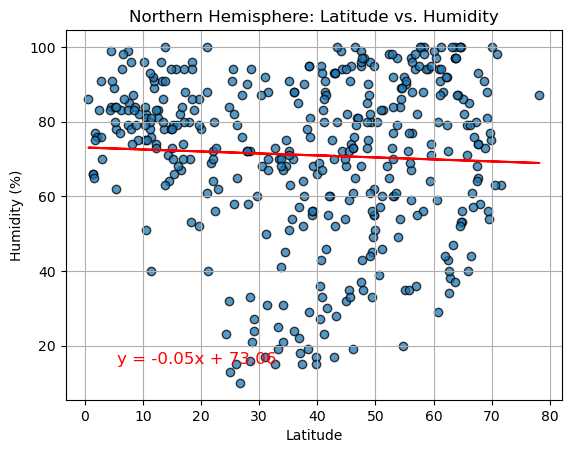

In [86]:
# Northern Hemisphere
# Plot Humidity vs. Latitude for Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Northern Hemisphere: Latitude vs. Humidity',
                       'output_data/Northern_Lat_vs_Humidity.png')


The r-squared value is: 0.00032533357924695305


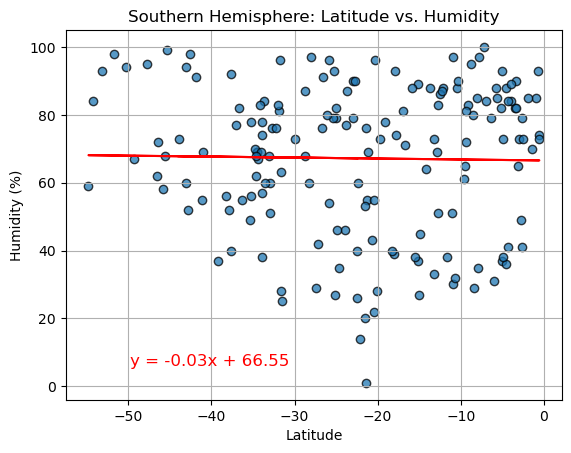

In [87]:
# Southern Hemisphere

# Plot Humidity vs. Latitude for Southern Hemisphere

linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Southern Hemisphere: Latitude vs. Humidity',
                       'output_data/Southern_Lat_vs_Humidity.png')


**Discussion about the linear relationship:** 

Weather data from cities across both hemispheres was collected, focusing on latitude and humidity. The scatter plot for the Northern Hemisphere shows negative slope of the regression line suggests a slight decrease in humidity as latitude increases. 
Similarly, the scatter plot for the Southern Hemisphere shows humidity against latitude. The positive slope of the regression line suggests a slight increase in humidity as latitude increases (moving towards the equator)
The extremely low r-squared values in both hemispheres reveal that latitude is not a significant predictor of humidity. Several other factors contribute more significantly to humidity levels such as: proximity to Water Bodies, topography, and local climate and weather patterns.
The analysis confirms that the relationship between latitude and humidity is weak in both the Northern and Southern Hemispheres.


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.004194316467050224


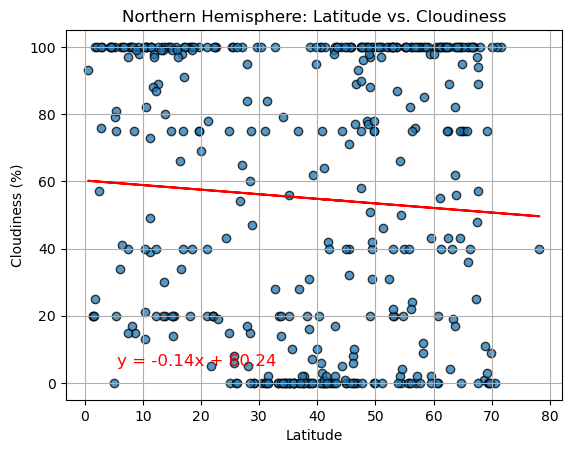

In [92]:
# Northern Hemisphere
# Plot Cloudiness vs. Latitude for Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Northern Hemisphere: Latitude vs. Cloudiness',
                       'output_data/Northern_Lat_vs_Cloudiness.png')

The r-squared value is: 0.004738065467197692


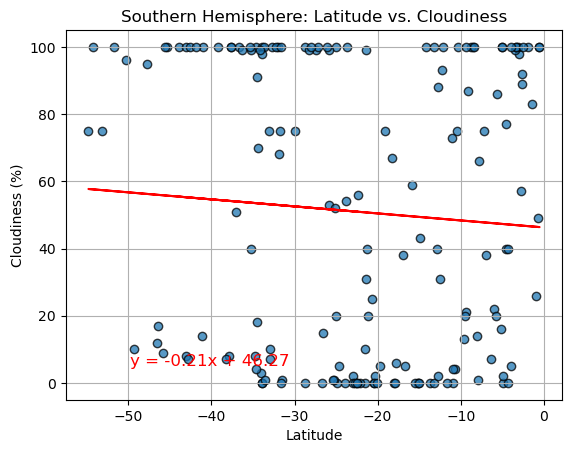

In [91]:
# Southern Hemisphere
# Plot Cloudiness vs. Latitude for Southern Hemisphere
# Plot Cloudiness vs. Latitude for Southern Hemisphere
linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Southern Hemisphere: Latitude vs. Cloudiness',
                       'output_data/Southern_Lat_vs_Cloudiness.png')

**Discussion about the linear relationship:** 

The scatter plot for the Northern Hemisphere shows a negative slope of the regression line suggests a very slight decrease in cloudiness as latitude increases.
Similarly, the scatter plot for the Southern Hemisphere shows cloudiness against latitude. The positive slope of the regression line suggests a slight increase in cloudiness as latitude increases (moving towards the equator). However, the r-squared value of 0.00033 indicates an almost negligible relationship between latitude and cloudiness.

The extremely low r-squared values in both hemispheres reveal that latitude is not a significant predictor of cloudiness. This consistency across hemispheres underscores the limited influence of latitude on cloudiness compared to other factors.

The analysis confirms that the relationship between latitude and cloudiness is weak in both the Northern and Southern Hemispheres. Latitude accounts for a negligible portion of the variability in cloudiness levels, emphasizing the importance of other geographical, meteorological, and anthropogenic factors. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.00040323895811924095


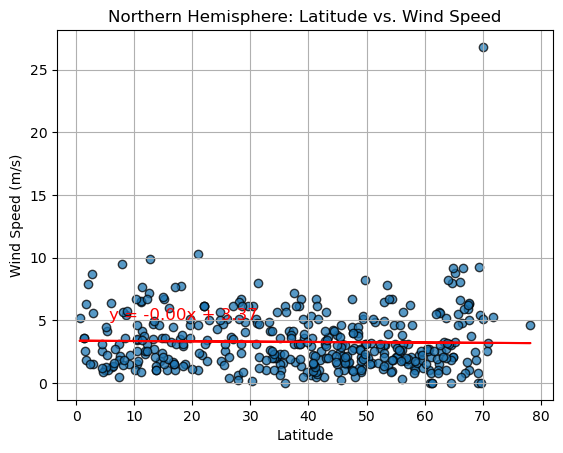

In [93]:
# Northern Hemisphere

# Plot Wind Speed vs. Latitude for Northern Hemisphere
linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Northern Hemisphere: Latitude vs. Wind Speed',
                       'output_data/Northern_Lat_vs_WindSpeed.png')

The r-squared value is: 0.017669696546746497


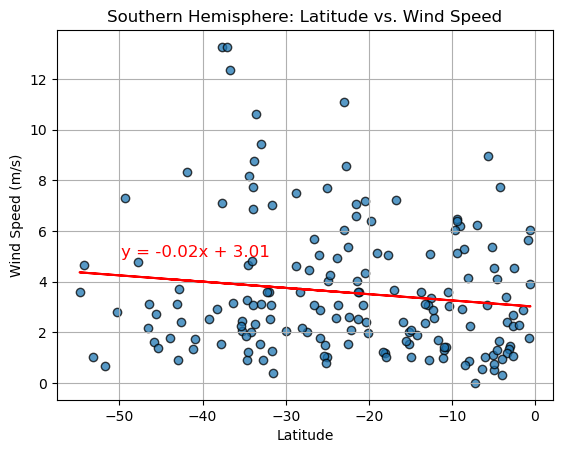

In [94]:
# Southern Hemisphere
# Plot Wind Speed vs. Latitude for Southern Hemisphere
linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'],
                       'Latitude', 'Wind Speed (m/s)',
                       'Southern Hemisphere: Latitude vs. Wind Speed',
                       'output_data/Southern_Lat_vs_WindSpeed.png')

**Discussion about the linear relationship:** 

The analysis confirms that the relationship between latitude and wind speed is weak in both the Northern and Southern Hemispheres. Latitude accounts for a small portion of the variability in wind speed levels, emphasizing the importance of other geographical, meteorological, and anthropogenic factors. Comprehensive climate models and predictions must integrate these factors to accurately represent wind speed distribution patterns.

Several factors contribute more significantly to wind speed levels such as proximity to water bodies, human activities, and atmospheric pressure systems.
